# Dataset Introduction

##### This dataset indeed models one electricity producer and three consumers. Here's how we identify them:

#### Producer:

##### The producer’s parameters are represented by tau1, p1, and g1:
##### tau1: Producer’s reaction time.
##### p1: Producer's power produced (positive value).
##### g1: Elasticity coefficient for the producer.

#### Consumers:

##### The three consumers are represented by tau2, tau3, and tau4 for reaction times, p2, p3, and p4 for power consumed (negative values), and g2, g3, and g4 for elasticity:
##### Consumer 1: Defined by tau2, p2, and g2.
##### Consumer 2: Defined by tau3, p3, and g3.
##### Consumer 3: Defined by tau4, p4, and g4.

# Predictive Features:


#### tau[x]: 
##### Reaction time in seconds for each participant (from tau1 to tau4). For tau1, it represents the electricity producer, while others represent consumers.
#### p[x]: 
##### Nominal Power, where positive values indicate power production (for producers like p1), and negative values indicate power consumption (for consumers, p2 to p4).
#### g[x]:
##### Coefficient for price elasticity, with g1 as the producer’s elasticity and others for the consumers. This coefficient represents responsiveness to price changes, relevant in stability analysis of producing or consumption if the price changes.The lower the value, the more stable is the level of producing/consuming when the price change
# Target Variables:

#### stab:
##### The stability of the electricity network. The maximum real part of the characteristic equation’s root. If positive, the system is unstable (numerical). If the value is positive, the system is considered unstable because disturbances tend to grow over time but if the value is negative or zero, the system is stable, meaning disturbances dissipate over time, keeping the network balanced and functioning as expected.
#### stabf:
##### Stability label based on stab, indicating 'stable' or 'unstable' status of the network (categorical).

In [6]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [7]:
# Step 3: Data Overview
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [8]:
# Step 4: Checking for Missing Values
df.isnull().sum()


tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

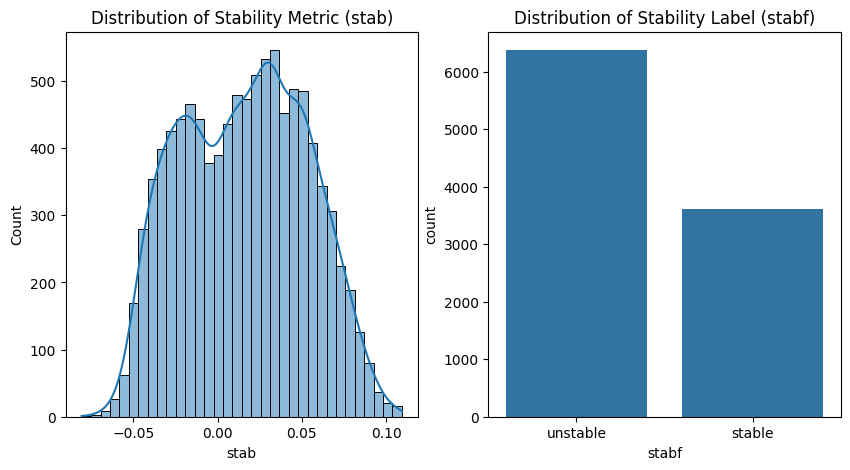

In [12]:
# Step 5: Understanding the Distribution of Target Variables (stab and stabf)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['stab'], kde=True)
plt.title('Distribution of Stability Metric (stab)')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='stabf')
plt.title('Distribution of Stability Label (stabf)')
plt.show()


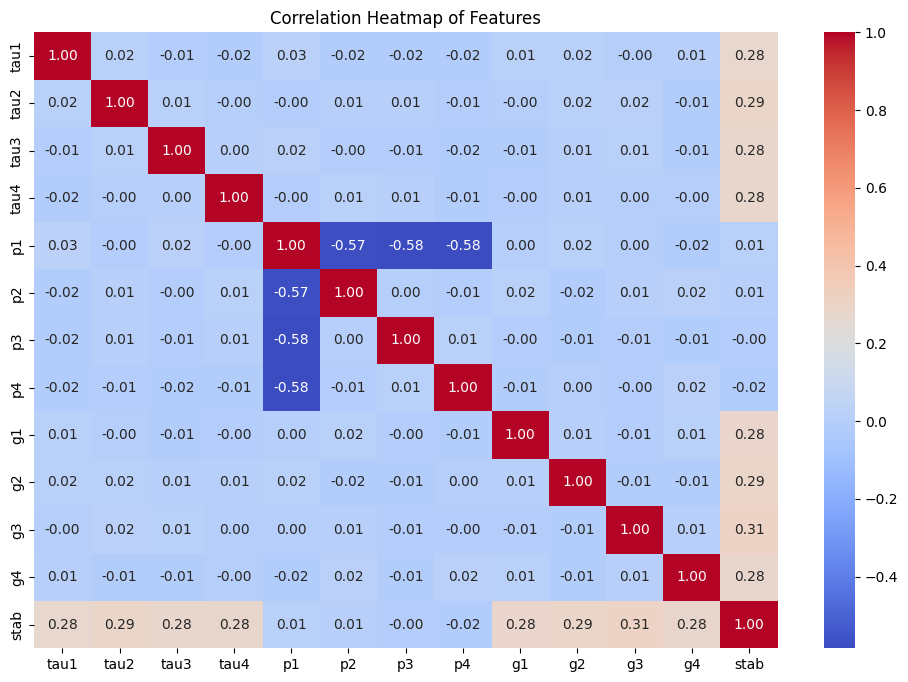

In [16]:
# Step 6: Correlation Analysis between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


### Analyzing and Plotting relationships between 'tau', 'p', and 'g' values of the Producer and stability metric

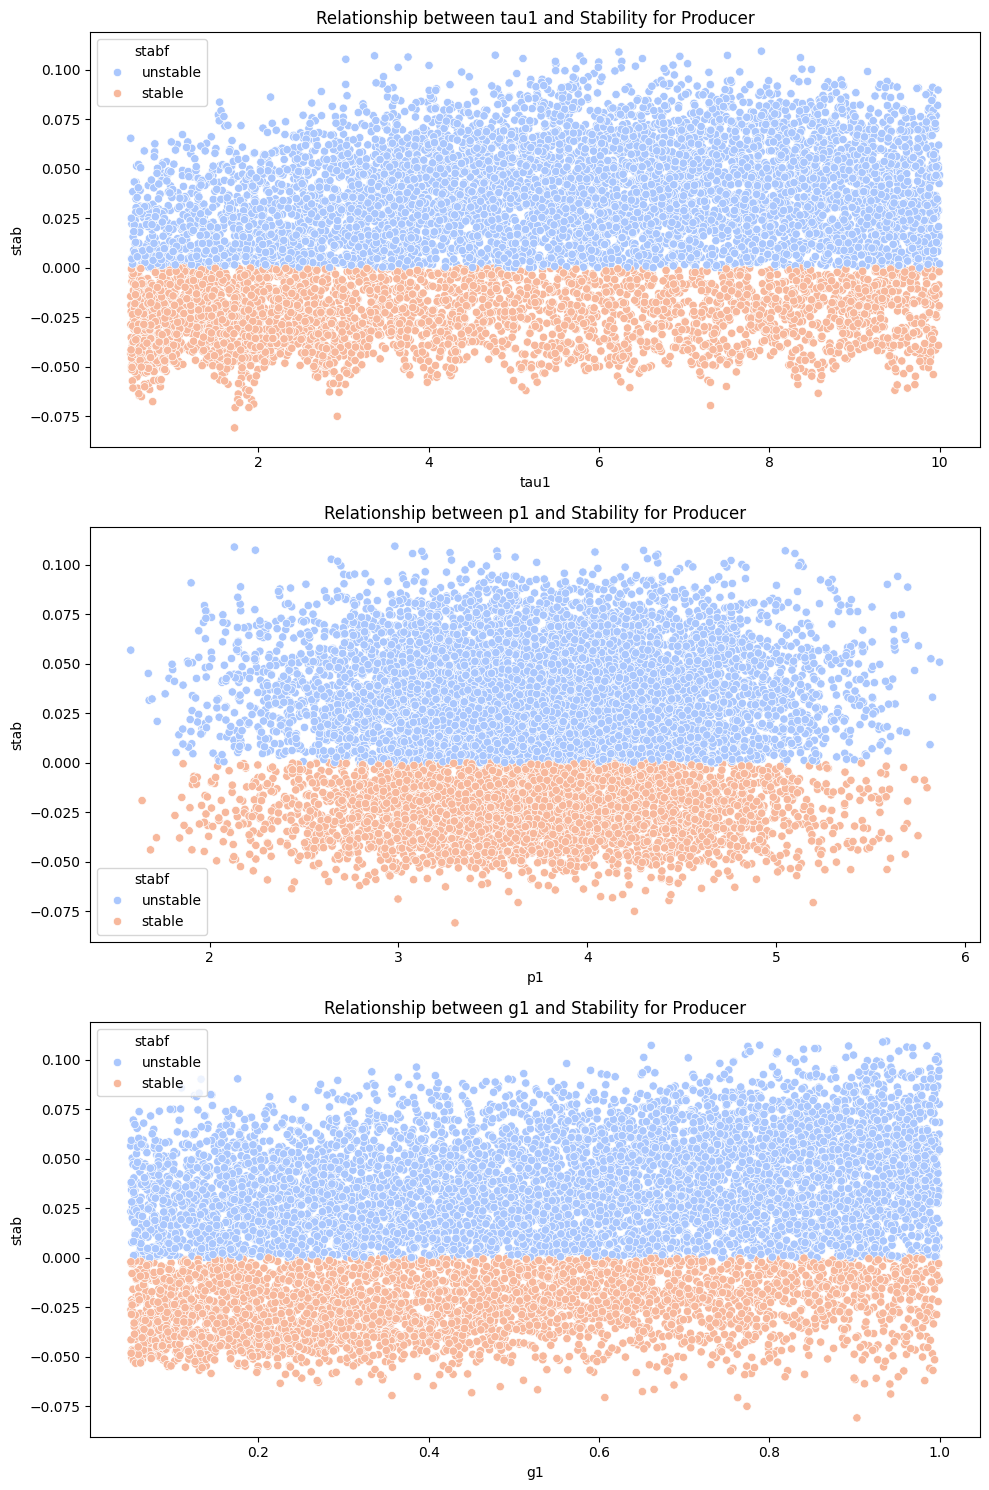

In [22]:
# Step 7: Analyzing and Plotting relationships between 'tau', 'p', and 'g' values of the Producer and stability metric
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, feature in enumerate(['tau1', 'p1', 'g1']):
    sns.scatterplot(data=df, x=feature, y='stab', hue='stabf', ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Relationship between {feature} and Stability for Producer')
    
plt.tight_layout()
plt.show()


### Feature Engineering: Creating new features for Consumers based on interactions or transformations of the features

In [33]:
# Step 8: Feature Engineering: Creating new features based on our features
df['consumers_tau_mean'] = df[['tau1', 'tau2', 'tau3', 'tau4']].mean(axis=1)
df['consumers_p_sum'] = df[['p1', 'p2', 'p3', 'p4']].sum(axis=1)
df['consumers_g_mean'] = df[['g1', 'g2', 'g3', 'g4']].mean(axis=1)

df[['consumers_tau_mean', 'consumers_p_sum', 'consumers_g_mean', 'stab']].head()


,consumers_tau_mean,consumers_p_sum,consumers_g_mean,stab
0,6.050181,-2.886580e-15,0.838878,0.055347
1,4.655880,-6.661338e-16,0.654938,-0.005957
2,5.520283,0.000000e+00,0.469757,0.003471
3,3.803305,-9.992007e-16,0.678763,0.028871
4,6.386054,4.996004e-15,0.682607,0.049860


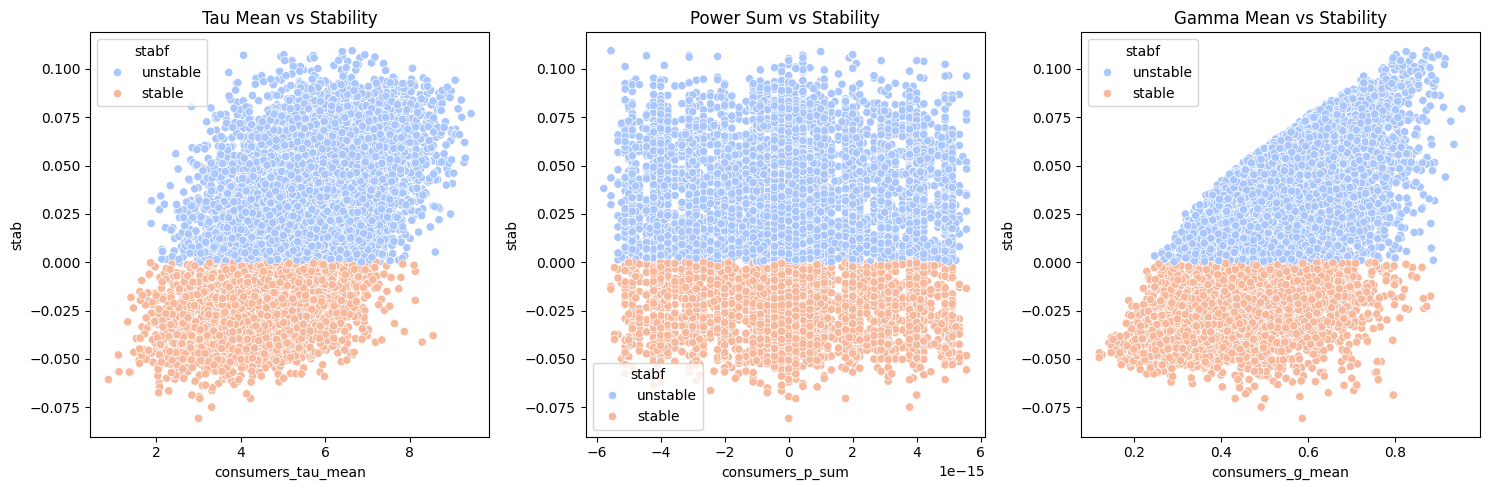

In [35]:
# Step 9: Visualize New Features vs Stability
# Visualizing the new features to see their relationships with stability metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df, x='consumers_tau_mean', y='stab', hue='stabf', ax=axes[0], palette='coolwarm')
axes[0].set_title('Tau Mean vs Stability')

sns.scatterplot(data=df, x='consumers_p_sum', y='stab', hue='stabf', ax=axes[1], palette='coolwarm')
axes[1].set_title('Power Sum vs Stability')

sns.scatterplot(data=df, x='consumers_g_mean', y='stab', hue='stabf', ax=axes[2], palette='coolwarm')
axes[2].set_title('Gamma Mean vs Stability')

plt.tight_layout()
plt.show()


In [37]:
# Step 10: Converting Stability Label to Numeric for Advanced Modeling 
df['stabf_binary'] = df['stabf'].apply(lambda x: 1 if x == 'unstable' else 0)
df[['stabf', 'stabf_binary']].head()


,stabf,stabf_binary
0,unstable,1
1,stable,0
2,unstable,1
3,unstable,1
4,unstable,1


In [38]:
# Step 11: Feature Selection: Dropping non-numeric columns and unrelated columns for modeling
X = df.drop(['stab', 'stabf', 'stabf_binary'], axis=1)  # Features for prediction
y = df['stabf_binary']  # Target for classification
X.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,consumers_tau_mean,consumers_p_sum,consumers_g_mean
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,6.050181,-2.886580e-15,0.838878
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,4.655880,-6.661338e-16,0.654938
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,5.520283,0.000000e+00,0.469757
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,3.803305,-9.992007e-16,0.678763
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,6.386054,4.996004e-15,0.682607


In [39]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 15), (2000, 15), (8000,), (2000,))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model 
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8165
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       693
           1       0.85      0.87      0.86      1307

    accuracy                           0.82      2000
   macro avg       0.80      0.79      0.80      2000
weighted avg       0.82      0.82      0.82      2000



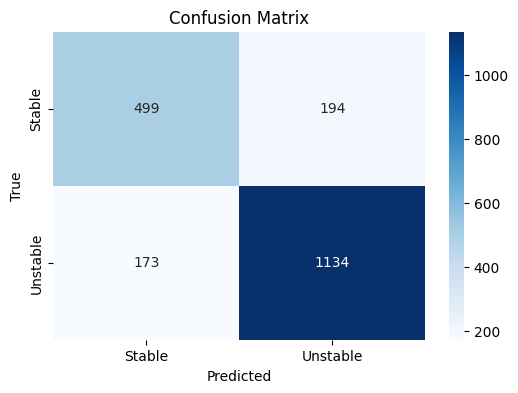

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#  confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stable', 'Unstable'], yticklabels=['Stable', 'Unstable'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
